In [1]:
import pandas as pd
import sys
from pathlib import Path
from datetime import datetime
import matplotlib.pyplot as plt
import analysis_utils
import app_utils

In [2]:
# POST A LOG FILE 
r = analysis_utils.post_log('-', '../../MBOT-RPI/data/convex_10mx10m_5cm.log')
r

In [2]:
df = analysis_utils.get_table('prod')
df

,BOT NAME,PICKLE NAME,PICKLE PATH,LOG NAME,LOG PATH,DESCRIPTION,DATE,DATETIME
0,CLASS FILE,2020_10_09_20:36:47.pkl,/home/michaellevy/data/prod/mbot/pickle/2020_1...,2020_10_09_20:36:47.log,/home/michaellevy/data/prod/mbot/log/2020_10_0...,CONVEX_10MX10M_5CM,2020-10-09-20:36:47,2020-10-09 20:36:47
1,MICHAEL,2020_10_10_19:43:24.pkl,/home/michaellevy/data/prod/mbot/pickle/2020_1...,2020_10_10_19:43:24.log,/home/michaellevy/data/prod/mbot/log/2020_10_1...,TESTING DRIVE,2020-10-10-19:43:24,2020-10-10 19:43:24.437402-04:00


In [3]:
# get df from runId
runId = 1
df = analysis_utils.get_df(runId)

In [4]:
df.keys()

dict_keys(['MBOT_IMU', 'MBOT_ENCODERS', 'ODOMETRY', 'MBOT_TIMESYNC', 'MBOT_MOTOR_COMMAND'])

In [5]:
df_lookup = app_utils.get_lookup(df)
df_lookup

,MBOT_IMU,MBOT_ENCODERS,ODOMETRY,MBOT_MOTOR_COMMAND,MBOT_TIMESYNC
0,timestamp,timestamp,timestamp,timestamp,timestamp
1,utime,utime,utime,utime,utime
2,gyro,leftticks,x,trans_v,None
3,accel,rightticks,y,angular_v,None
4,mag,left_delta,theta,None,None
5,tb_angles,right_delta,None,None,None
6,temp,None,None,None,None


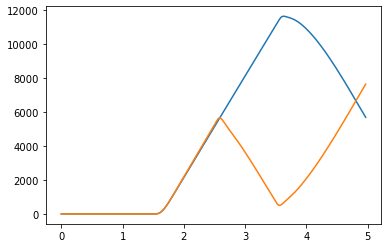

In [6]:
channel = 'MBOT_ENCODERS'
time = app_utils.shift(df[channel]['timestamp'], time=True)
ticks = app_utils.shift(df[channel]['leftticks'])
plt.plot(time, app_utils.shift(df[channel]['rightticks']))
plt.plot(time, app_utils.shift(df[channel]['leftticks']))
plt.show()


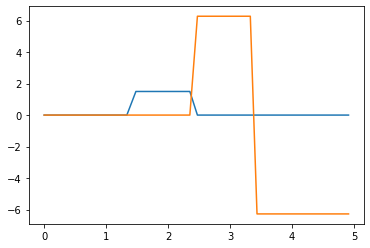

In [7]:
channel = 'MBOT_MOTOR_COMMAND'
time = app_utils.shift(df[channel]['timestamp'], time=True)

plt.plot(time, app_utils.shift(df[channel]['trans_v']))
plt.plot(time, app_utils.shift(df[channel]['angular_v']))
plt.show()

In [8]:
import tempfile as tf

NameError: name 'tempfile' is not defined